# Comparison plot of the various indicators, by response or property type

Here the objective is to see if uncertainty voxets or dissimilarity measures follow similar trends. 

 1. compare Cardinality to Entropy - uncertainty voxets (local measures)
     - for discrete property fieled, we can note a strong correlation
     - for continuous property fields, the standard deviation (instead of cardinality) might be dominated by extreme values in the ensemble, while the continuous entropy will refelect more the variety of patterns.
 2. compare dissimilarity measures (global measures) based on
     - *his*: histogram 
     - *2ps*: two-point statistics (semi-variogram)
     - *mph*: multiple-point histogram
     - *cty*: connectivity
     - *wvt*: wavelet
     - *shd*: topological structural Hamming distance
     - *lsg*: topological Laplacian spectral graph distance
     
For each property field
 - Magnetic response
 - Gravity response
 - Lithocodes
 - Density
 - Magnetic susceptibility,
 
three figures are generated:

 1. section comparison of local measures of uncertainty (i.e. cardinality and entropy)
 2. 2D multi-dimensional scaling representation of the global dissimilarity measures
 3. cloud and density cross plots.
 

In [1]:
# import modules
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import pickle
from sklearn import manifold
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# init parameters
myseed = 65432
pfn_histo = "./pickledata/testing-model-subset-histogram.pickle"
pfn_mph = "./pickledata/testing-model-subset-mph.pickle"
pfn_semivario = "./pickledata/testing-model-subset-semivariogram.pickle"
pfn_connectivity = "./pickledata/testing-model-subset-connectivity.pickle"
pfn_wavelet = "./pickledata/testing-model-subset-wavelet.pickle"
pfn_entropy = "./pickledata/testing-model-subset-entropy.pickle"
pfn_cardinality = "./pickledata/testing-model-subset-cardinality.pickle"
pfn_topology = "./pickledata/testing-model-subset-topology.pickle"

# load computed measures
with open(pfn_histo, 'rb') as f:
    [dist_hist_mag,dist_hist_grv,dist_hist_mod,dist_hist_rho,dist_hist_sus,
                 mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus] = pickle.load(f)

with open(pfn_mph, 'rb') as f:
    [dist_mph_mag,dist_mph_grv,dist_mph_mod,dist_mph_rho,dist_mph_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus] = pickle.load(f)

with open(pfn_semivario, 'rb') as f:
    [dist_2ps_mag,dist_2ps_grv,dist_2ps_mod,dist_2ps_rho,dist_2ps_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus] = pickle.load(f)

with open(pfn_connectivity, 'rb') as f:
    [dist_cty_mag,dist_cty_grv,dist_cty_mod,dist_cty_rho,dist_cty_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus] = pickle.load(f)

with open(pfn_wavelet, 'rb') as f:
    [dist_wvt_mag,dist_wvt_grv,dist_wvt_mod,dist_wvt_rho,dist_wvt_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus] = pickle.load(f)

with open(pfn_entropy, 'rb') as f:
    [ent_grv,ent_mag,ent,ent_rho,ent_sus] = pickle.load(f)

with open(pfn_cardinality, 'rb') as f:
    [grv_rngstd,mag_rngstd,grv_rng,mag_rng,grv_std,mag_std,crd,rho_rngstd,sus_rngstd,rho_rng,sus_rng,rho_std,sus_std] = pickle.load(f)

with open(pfn_topology, 'rb') as f:
    [dist_tpl_shd_mag,dist_tpl_shd_grv,dist_tpl_shd_mod,dist_tpl_shd_rho,dist_tpl_shd_sus,
                  dist_tpl_lsgd_mag,dist_tpl_lsgd_grv,dist_tpl_lsgd_mod,dist_tpl_lsgd_rho,
                  dist_tpl_lsgd_sus] = pickle.load(f)

## Define plotting functions

In [2]:
from sklearn import manifold
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_wvt,dist_cty,dist_tpl_shd,dist_tpl_lsgd,title_spec):
    nsamples = dist_hist.shape[0]
    
    mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=myseed,
                        dissimilarity="precomputed", n_jobs=1)
    mdspos_his = mds.fit(dist_hist).embedding_
    mdspos_mph = mds.fit(dist_mph).embedding_
    mdspos_2ps = mds.fit(dist_2ps).embedding_
    mdspos_cty = mds.fit(dist_cty).embedding_
    mdspos_wvt = mds.fit(dist_wvt).embedding_
    mdspos_shd = mds.fit(dist_tpl_shd).embedding_
    mdspos_lsg = mds.fit(dist_tpl_lsgd).embedding_
    
    # MDS plot
    plt.figure()
    ax = plt.axes([0., 0., 1., 1.])
    s = 100
    plt.scatter(mdspos_his[:, 0], mdspos_his[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='his', marker='o')
    plt.scatter(mdspos_2ps[:, 0], mdspos_2ps[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='2ps', marker='v')
    plt.scatter(mdspos_mph[:, 0], mdspos_mph[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='mph', marker='^')
    plt.scatter(mdspos_cty[:, 0], mdspos_cty[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='cty', marker='<')
    plt.scatter(mdspos_wvt[:, 0], mdspos_wvt[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='wvt', marker='>')
    plt.scatter(mdspos_shd[:, 0], mdspos_shd[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='shd', marker='s')
    plt.scatter(mdspos_lsg[:, 0], mdspos_lsg[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='lsg', marker='*')
    plt.legend(scatterpoints=1, loc='best', shadow=False)
    ax.set_title('2D Multi-Dimensional Scaling Representation of '+ title_spec +' (dis-)similarities')
    plt.show()
    
    # SNS plot
    ix=np.tril_indices(nsamples,k=-1)
    df= pd.DataFrame({'his':dist_hist[ix], '2ps':dist_2ps[ix], 'mph':dist_mph[ix], 'cty':dist_cty[ix], 'wvt':dist_wvt[ix],
                      'shd':dist_tpl_shd[ix], 'lsg':dist_tpl_lsgd[ix]})
    g = sns.PairGrid(df)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)
    return

def plot_2D_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec):
    cmin = np.amin(cardinality)
    cmax = np.amax(cardinality)
    emin = np.amin(entropy)
    emax = np.amax(entropy)
    nrm01_card = (cardinality.flatten()-cmin)/(cmax-cmin)
    nrm01_ent = (entropy.flatten()-emin)/(emax-emin)
    fig = plt.figure()
    gs = fig.add_gridspec(1,8)
    ax0 = fig.add_subplot(gs[0, 0:2])
    ax0leg = fig.add_subplot(gs[0, 2])
    ax1 = fig.add_subplot(gs[0, 3:5])
    ax1leg = fig.add_subplot(gs[0, 5])
    ax2 = fig.add_subplot(gs[0, 6:])
    pos0=ax0.imshow(cardinality)
    ax0.axis('off'),ax0.set_title(lgd_card),ax0leg.axis('off')
    axins0 = inset_axes(ax0leg,
                       width="10%",  # width = 5% of parent_bbox width
                       height="90%",  # height : 50%
                       loc='center left'
                       )
    fig.colorbar(pos0,cax=axins0,ticks=[]) 
    ax1.imshow(entropy)
    ax1.axis('off'),ax1.set_title(lgd_ent),ax1leg.axis('off')
    ax2.scatter(nrm01_card,nrm01_ent,c='blue',marker='+')
    ax2.set_xlabel('norm. cardinality'),ax2.set_ylabel('norm. entropy')
    ax2.set_title(title_spec)
    fig.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.35, wspace=0.3, hspace=0.5)
    plt.show()
    return
def plot_3D_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec):
    cmin = np.amin(cardinality)
    cmax = np.amax(cardinality)
    emin = np.amin(entropy)
    emax = np.amax(entropy)
    nrm01_card = (cardinality.flatten()-cmin)/(cmax-cmin)
    nrm01_ent = (entropy.flatten()-emin)/(emax-emin)
    fig = plt.figure()
    gs = fig.add_gridspec(2,12)
    ax00leg = fig.add_subplot(gs[0, 0])
    ax01 = fig.add_subplot(gs[0, 1:3])
    ax02 = fig.add_subplot(gs[0, 3:5])
    ax03 = fig.add_subplot(gs[0, 5:7])
    ax10leg = fig.add_subplot(gs[1, 0])
    ax11 = fig.add_subplot(gs[1, 1:3])
    ax12 = fig.add_subplot(gs[1, 3:5])
    ax13 = fig.add_subplot(gs[1, 5:7])
    ax4 = fig.add_subplot(gs[:, 8:])
    ax01.axis('off'),ax02.axis('off'),ax03.axis('off')
    ax11.axis('off'),ax12.axis('off'),ax13.axis('off')
    ax01.set_title('Map'), ax02.set_title('W (N) E'), ax03.set_title('N (W) S')
    ax11.set_title('Map'), ax12.set_title('W (N) E'), ax13.set_title('N (W) S')
    pos01=ax01.imshow(cardinality[0,:,:],vmin=cmin,vmax=cmax)
    ax02.imshow(cardinality[:,0,:],vmin=cmin,vmax=cmax)
    ax03.imshow(cardinality[:,:,0],vmin=cmin,vmax=cmax)
    ax00leg.axis('off') #,ax00leg.set_title(lgd_card)
    axins00 = inset_axes(ax00leg,
                       width="10%",  # width = 5% of parent_bbox width
                       height="90%",  # height : 50%
                       loc='center left'
                       )
    fig.colorbar(pos01,cax=axins00,label=lgd_card) 
    pos11=ax11.imshow(entropy[0,:,:],vmin=emin,vmax=emax)
    ax12.imshow(entropy[:,0,:],vmin=emin,vmax=emax)
    ax13.imshow(entropy[:,:,0],vmin=emin,vmax=emax)
    ax10leg.axis('off') #,ax10leg.set_title(lgd_ent)
    axins10 = inset_axes(ax10leg,
                       width="10%",  # width = 5% of parent_bbox width
                       height="90%",  # height : 50%
                       loc='center left'
                       )
    fig.colorbar(pos11,cax=axins10,label=lgd_ent) 
    ax4.scatter(nrm01_card,nrm01_ent,c='blue',marker='+')
    ax4.set_xlabel('norm. cardinality'),ax4.set_ylabel('norm. entropy')
    ax4.set_title(title_spec)
    fig.subplots_adjust(left=0.0, bottom=0.0, right=1.15, top=0.55, wspace=0.1, hspace=0.25)
    plt.show()
    return

def plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec):
    dim = len(entropy.shape)
    if dim ==2:
        plot_2D_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
    elif dim==3:
        plot_3D_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
    else:
        print("NA for dimensions>3 or dimensions<2")
    return

# Magnetic response plots

21-Jul-2021 (09:20:41) - MAGNETIC UNCERTAINTY VOXETS COMPARISON START


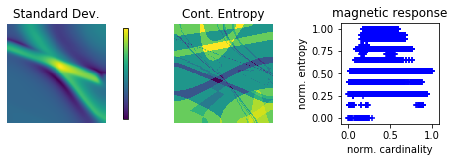

21-Jul-2021 (09:20:42) - MAGNETIC UNCERTAINTY VOXETS COMPARISON END
21-Jul-2021 (09:20:42) - MAGNETIC DISSIMILARITY COMPARISON START


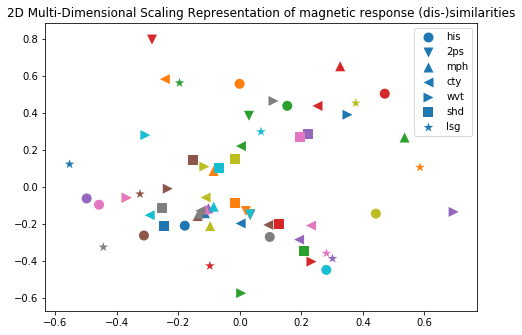

21-Jul-2021 (09:20:49) - MAGNETIC DISSIMILARITY COMPARISON END


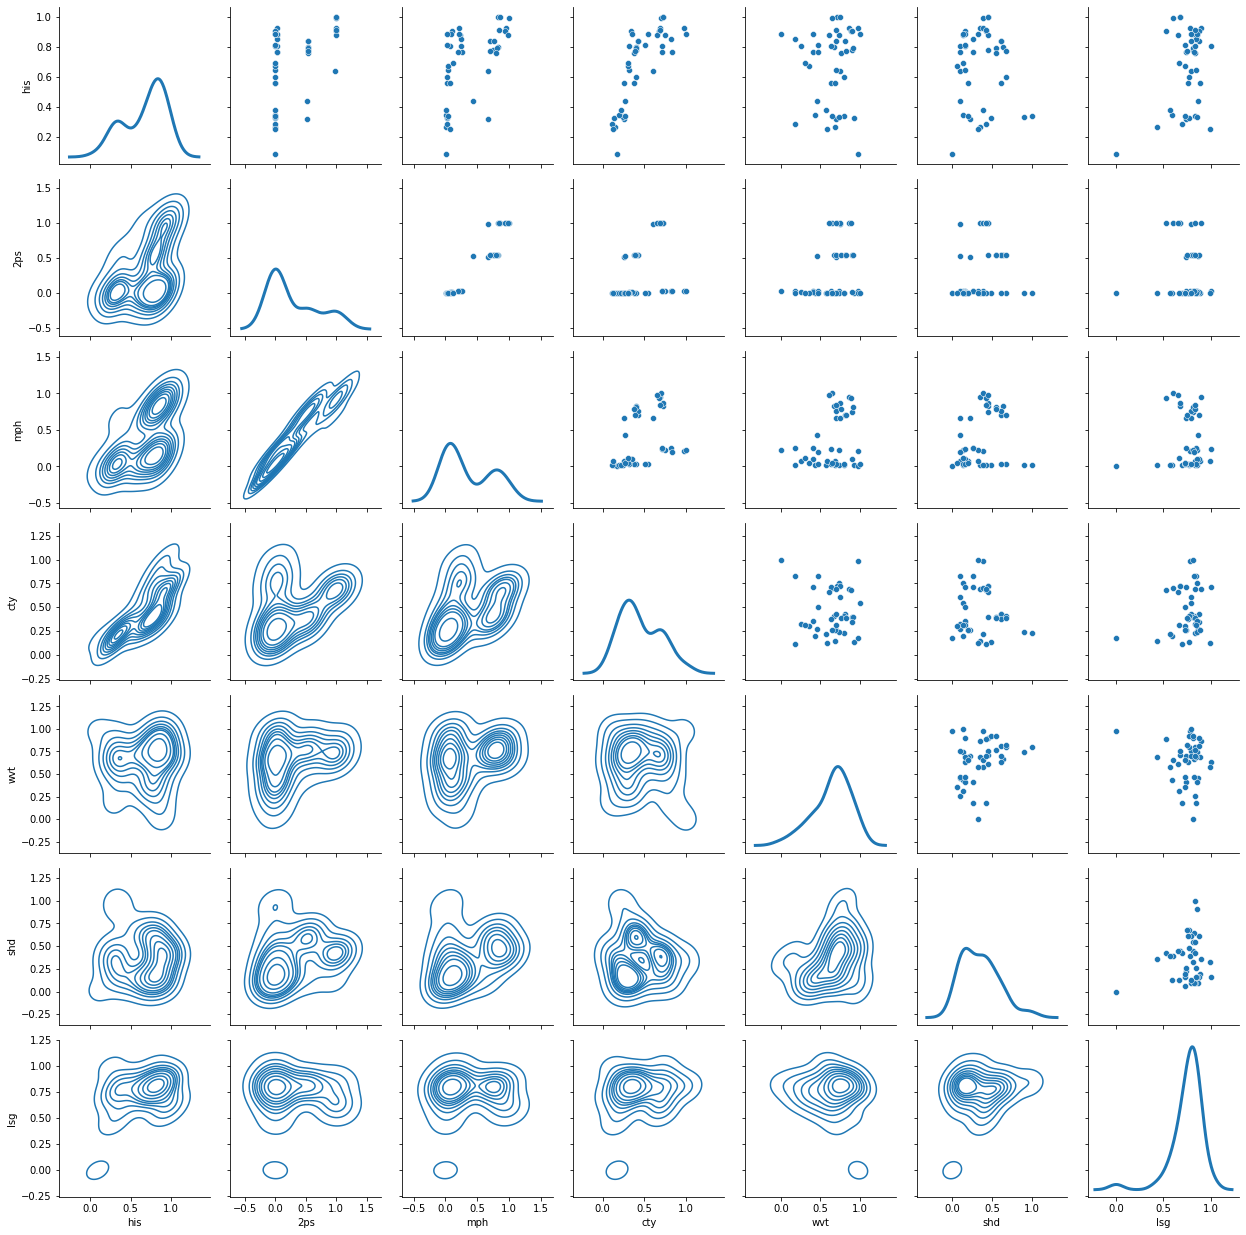

In [3]:
title_spec = 'magnetic response'
lgd_ent = 'Cont. Entropy'
lgd_card = 'Standard Dev.'

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAGNETIC UNCERTAINTY VOXETS COMPARISON START")
entropy = ent_mag
cardinality = mag_std
plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAGNETIC UNCERTAINTY VOXETS COMPARISON END")

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAGNETIC DISSIMILARITY COMPARISON START")
# normalization between [0-1]
dist_hist = (dist_hist_mag-np.amin(dist_hist_mag))/(np.amax(dist_hist_mag)-np.amin(dist_hist_mag))
dist_mph = (dist_mph_mag-np.amin(dist_mph_mag))/(np.amax(dist_mph_mag)-np.amin(dist_mph_mag))
dist_2ps = (dist_2ps_mag-np.amin(dist_2ps_mag))/(np.amax(dist_2ps_mag)-np.amin(dist_2ps_mag))
dist_cty = (dist_cty_mag-np.amin(dist_cty_mag))/(np.amax(dist_cty_mag)-np.amin(dist_cty_mag))
dist_wvt = (dist_wvt_mag-np.amin(dist_wvt_mag))/(np.amax(dist_wvt_mag)-np.amin(dist_wvt_mag))
dist_tpl_shd = (dist_tpl_shd_mag-np.amin(dist_tpl_shd_mag))/(np.amax(dist_tpl_shd_mag)-np.amin(dist_tpl_shd_mag))
dist_tpl_lsgd = (dist_tpl_lsgd_mag-np.amin(dist_tpl_lsgd_mag))/(np.amax(dist_tpl_lsgd_mag)-np.amin(dist_tpl_lsgd_mag))
title_spec = 'magnetic response'
plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_cty,dist_wvt,dist_tpl_shd,dist_tpl_lsgd,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAGNETIC DISSIMILARITY COMPARISON END")

# Gravity response plots

21-Jul-2021 (09:20:55) - GRAVITY UNCERTAINTY VOXETS COMPARISON START


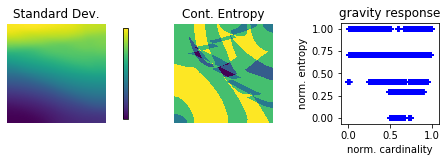

21-Jul-2021 (09:20:55) - GRAVITY UNCERTAINTY VOXETS COMPARISON END
21-Jul-2021 (09:20:55) - GRAVITY DISSIMILARITY COMPARISON START


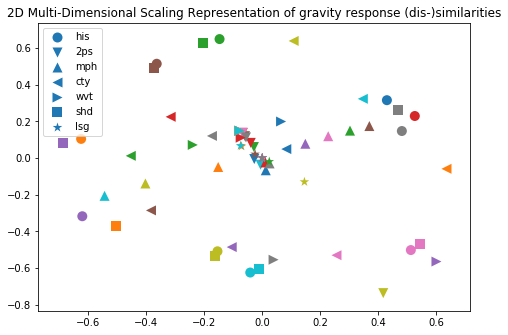

21-Jul-2021 (09:21:02) - GRAVITY DISSIMILARITY COMPARISON END


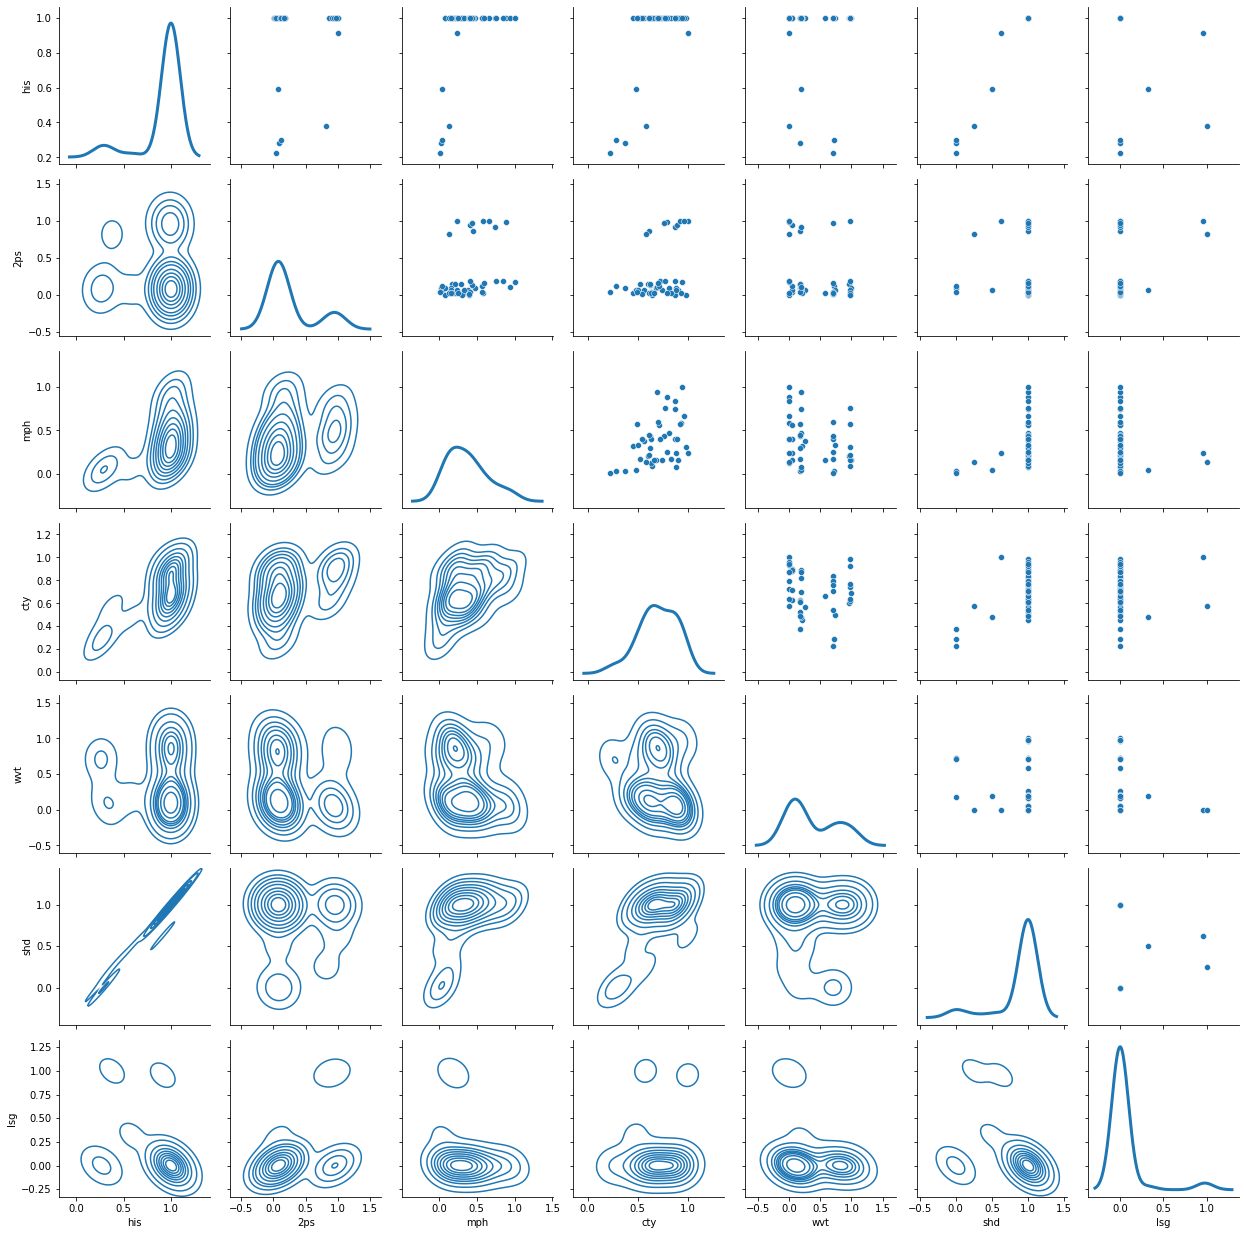

In [4]:
title_spec = 'gravity response'
lgd_ent = 'Cont. Entropy'
lgd_card = 'Standard Dev.'

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"GRAVITY UNCERTAINTY VOXETS COMPARISON START")
entropy = ent_grv
cardinality = grv_std
plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"GRAVITY UNCERTAINTY VOXETS COMPARISON END")

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"GRAVITY DISSIMILARITY COMPARISON START")
# normalization between [0-1]
dist_hist = (dist_hist_grv-np.amin(dist_hist_grv))/(np.amax(dist_hist_grv)-np.amin(dist_hist_grv))
dist_mph = (dist_mph_grv-np.amin(dist_mph_grv))/(np.amax(dist_mph_grv)-np.amin(dist_mph_grv))
dist_2ps = (dist_2ps_grv-np.amin(dist_2ps_grv))/(np.amax(dist_2ps_grv)-np.amin(dist_2ps_grv))
dist_cty = (dist_cty_grv-np.amin(dist_cty_grv))/(np.amax(dist_cty_grv)-np.amin(dist_cty_grv))
dist_wvt = (dist_wvt_grv-np.amin(dist_wvt_grv))/(np.amax(dist_wvt_grv)-np.amin(dist_wvt_grv))
dist_tpl_shd = (dist_tpl_shd_grv-np.amin(dist_tpl_shd_grv))/(np.amax(dist_tpl_shd_grv)-np.amin(dist_tpl_shd_grv))
dist_tpl_lsgd = (dist_tpl_lsgd_grv-np.amin(dist_tpl_lsgd_grv))/(np.amax(dist_tpl_lsgd_grv)-np.amin(dist_tpl_lsgd_grv))
plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_cty,dist_wvt,dist_tpl_shd,dist_tpl_lsgd,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"GRAVITY DISSIMILARITY COMPARISON END")

# Lithocode plots

21-Jul-2021 (09:21:09) - LITHOCODE UNCERTAINTY VOXETS COMPARISON START


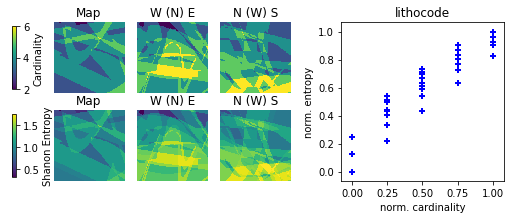

21-Jul-2021 (09:21:31) - LITHOCODE UNCERTAINTY VOXETS COMPARISON END
21-Jul-2021 (09:21:31) - LITHOCODE DISSIMILARITY COMPARISON START


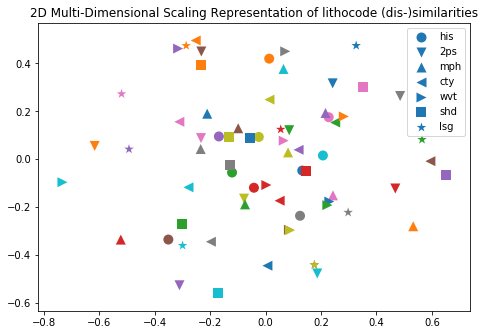

21-Jul-2021 (09:21:39) - LITHOCODE DISSIMILARITY COMPARISON END


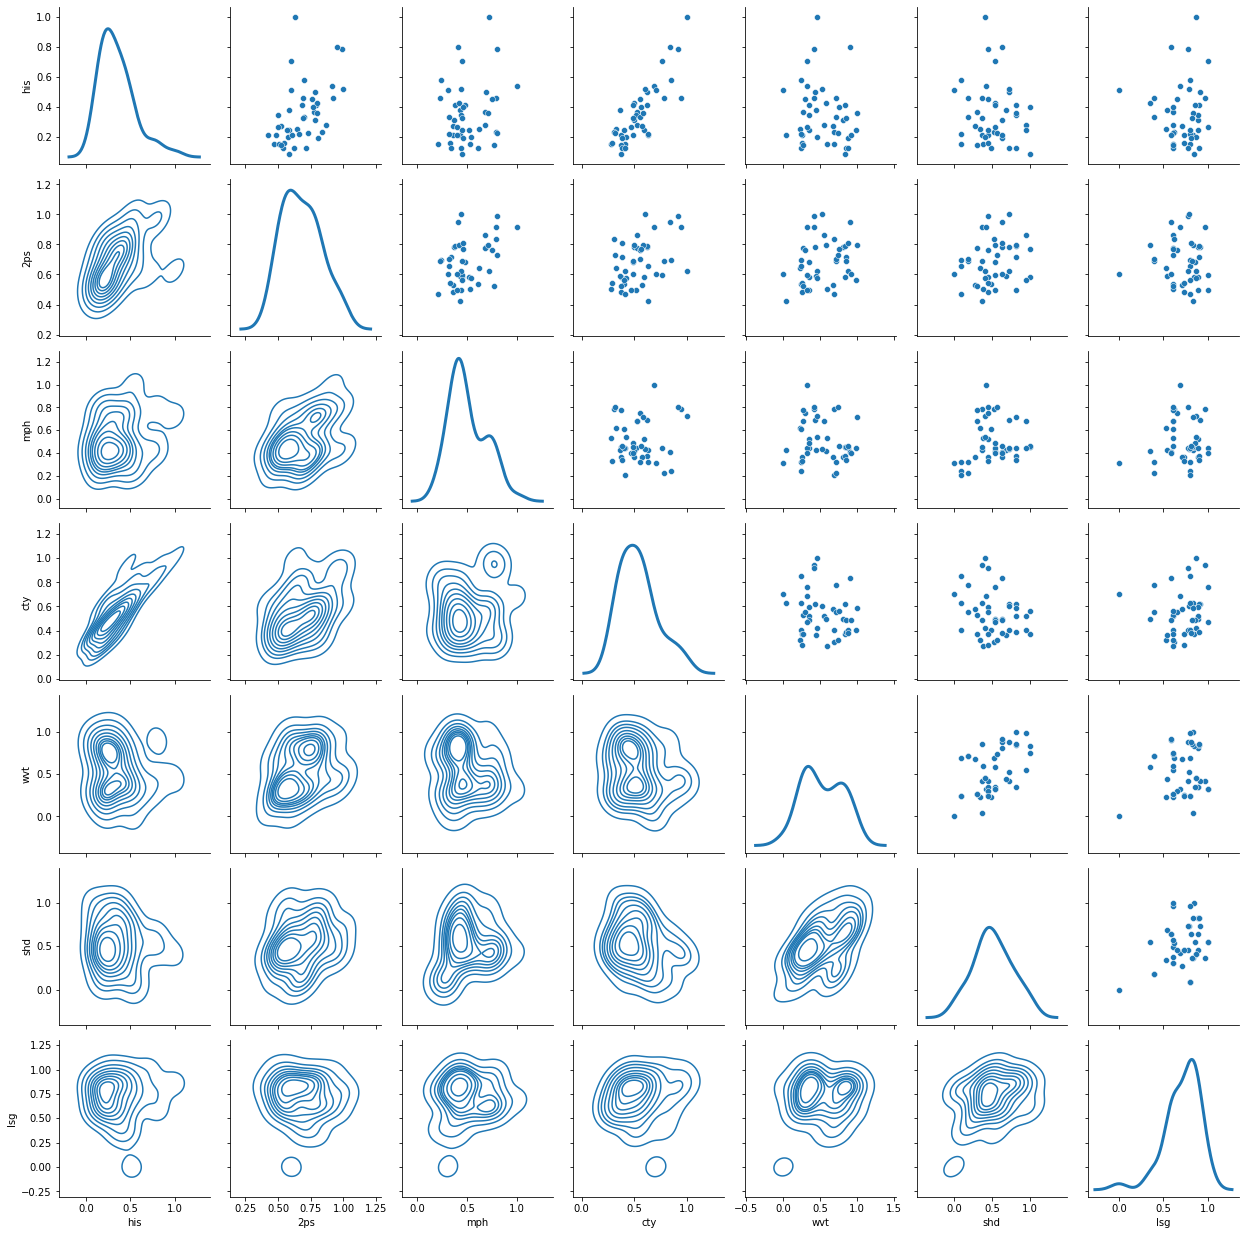

In [5]:
title_spec = 'lithocode'
lgd_ent = 'Shanon Entropy'
lgd_card = 'Cardinality'

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"LITHOCODE UNCERTAINTY VOXETS COMPARISON START")
entropy = ent
cardinality = crd
plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"LITHOCODE UNCERTAINTY VOXETS COMPARISON END")

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"LITHOCODE DISSIMILARITY COMPARISON START")
# normalization between [0-1]
dist_hist = (dist_hist_mod-np.amin(dist_hist_mod))/(np.amax(dist_hist_mod)-np.amin(dist_hist_mod))
dist_mph = (dist_mph_mod-np.amin(dist_mph_mod))/(np.amax(dist_mph_mod)-np.amin(dist_mph_mod))
dist_2ps = (dist_2ps_mod-np.amin(dist_2ps_mod))/(np.amax(dist_2ps_mod)-np.amin(dist_2ps_mod))
dist_cty = (dist_cty_mod-np.amin(dist_cty_mod))/(np.amax(dist_cty_mod)-np.amin(dist_cty_mod))
dist_wvt = (dist_wvt_mod-np.amin(dist_wvt_mod))/(np.amax(dist_wvt_mod)-np.amin(dist_wvt_mod))
dist_tpl_shd = (dist_tpl_shd_mod-np.amin(dist_tpl_shd_mod))/(np.amax(dist_tpl_shd_mod)-np.amin(dist_tpl_shd_mod))
dist_tpl_lsgd = (dist_tpl_lsgd_mod-np.amin(dist_tpl_lsgd_mod))/(np.amax(dist_tpl_lsgd_mod)-np.amin(dist_tpl_lsgd_mod))
plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_cty,dist_wvt,dist_tpl_shd,dist_tpl_lsgd,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"LITHOCODE DISSIMILARITY COMPARISON END")

# Density plots

21-Jul-2021 (09:21:44) - DENSITY UNCERTAINTY VOXETS COMPARISON START


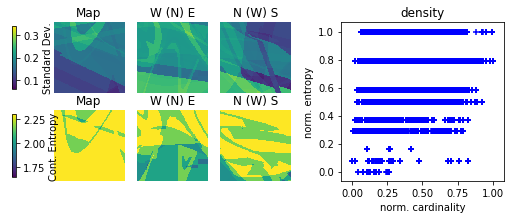

21-Jul-2021 (09:22:10) - DENSITY UNCERTAINTY VOXETS COMPARISON END
21-Jul-2021 (09:22:10) - DENSITY DISSIMILARITY COMPARISON START


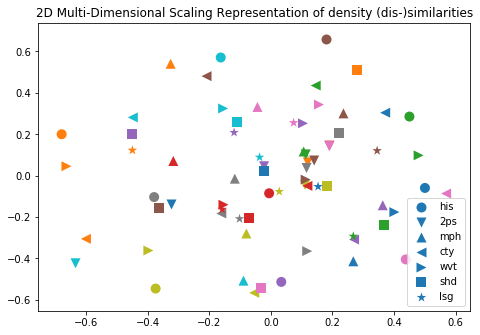

21-Jul-2021 (09:22:17) - DENSITY DISSIMILARITY COMPARISON END


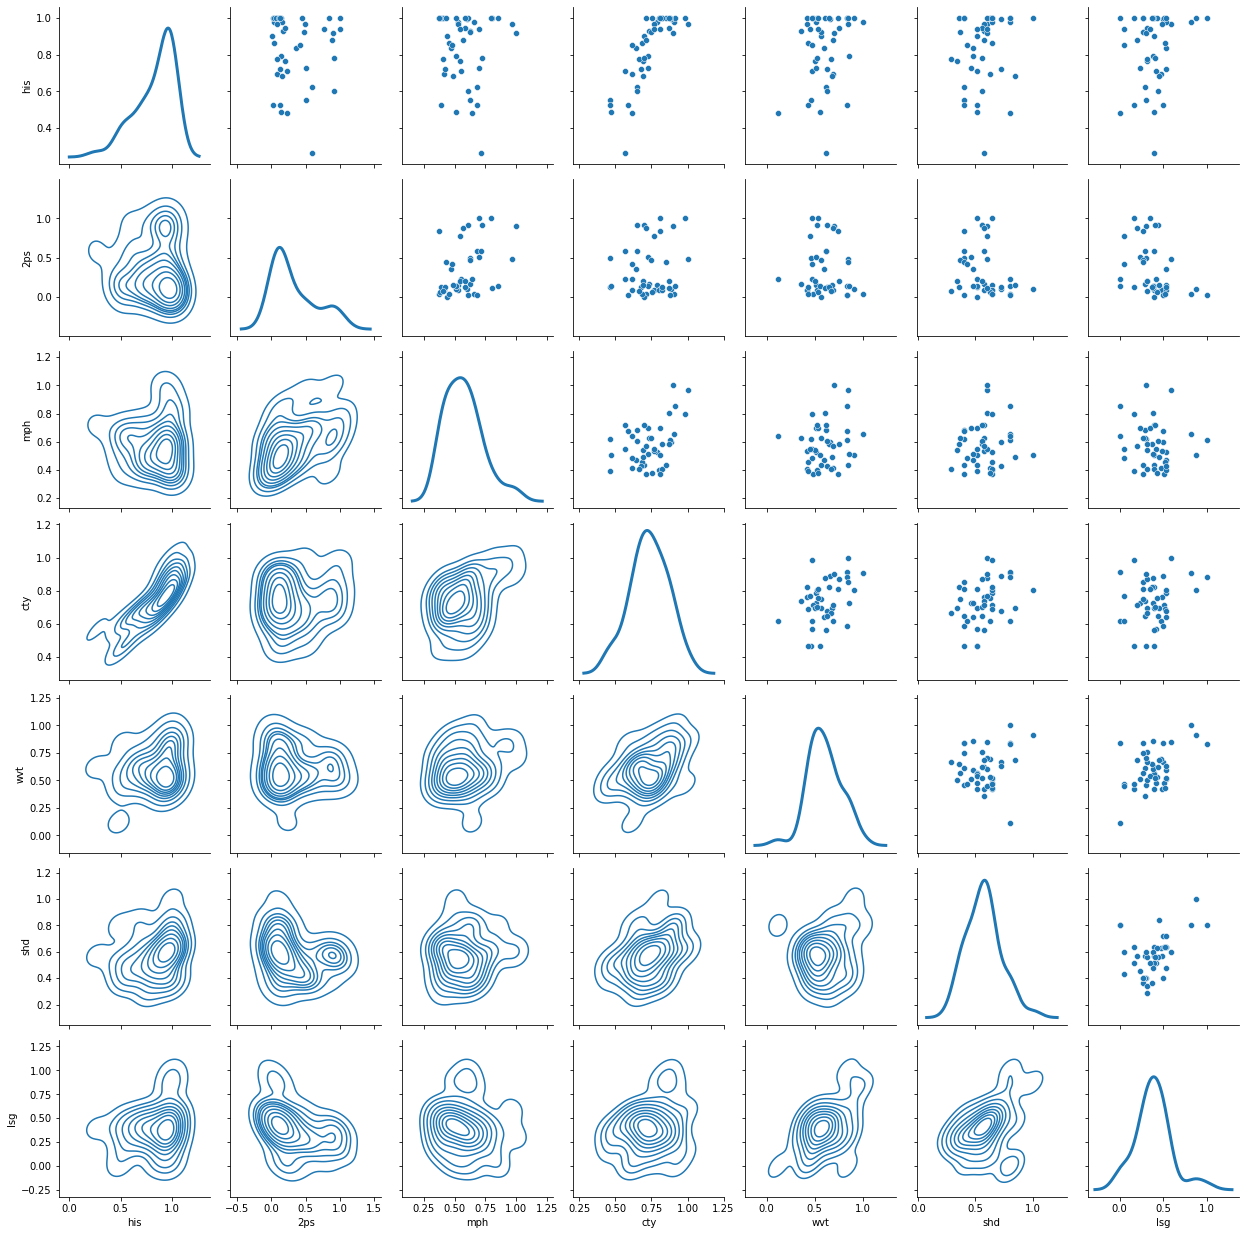

In [6]:
title_spec = 'density'
lgd_card = 'Standard Dev.'
lgd_ent = 'Cont. Entropy'

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"DENSITY UNCERTAINTY VOXETS COMPARISON START")
entropy = ent_rho
cardinality = rho_std
plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"DENSITY UNCERTAINTY VOXETS COMPARISON END")

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"DENSITY DISSIMILARITY COMPARISON START")
# normalization between [0-1]
dist_hist = (dist_hist_rho-np.amin(dist_hist_rho))/(np.amax(dist_hist_rho)-np.amin(dist_hist_rho))
dist_mph = (dist_mph_rho-np.amin(dist_mph_rho))/(np.amax(dist_mph_rho)-np.amin(dist_mph_rho))
dist_2ps = (dist_2ps_rho-np.amin(dist_2ps_rho))/(np.amax(dist_2ps_rho)-np.amin(dist_2ps_rho))
dist_cty = (dist_cty_rho-np.amin(dist_cty_rho))/(np.amax(dist_cty_rho)-np.amin(dist_cty_rho))
dist_wvt = (dist_wvt_rho-np.amin(dist_wvt_rho))/(np.amax(dist_wvt_rho)-np.amin(dist_wvt_rho))
dist_tpl_shd = (dist_tpl_shd_rho-np.amin(dist_tpl_shd_rho))/(np.amax(dist_tpl_shd_rho)-np.amin(dist_tpl_shd_rho))
dist_tpl_lsgd = (dist_tpl_lsgd_rho-np.amin(dist_tpl_lsgd_rho))/(np.amax(dist_tpl_lsgd_rho)-np.amin(dist_tpl_lsgd_rho))
plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_cty,dist_wvt,dist_tpl_shd,dist_tpl_lsgd,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"DENSITY DISSIMILARITY COMPARISON END")

# Magnetic susceptibility plots

21-Jul-2021 (09:22:23) - MAG. SUSC. UNCERTAINTY VOXETS COMPARISON START


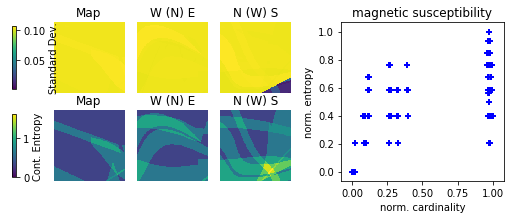

21-Jul-2021 (09:22:44) - MAG. SUSC. UNCERTAINTY VOXETS COMPARISON END
21-Jul-2021 (09:22:44) - MAG. SUSC. DISSIMILARITY COMPARISON START


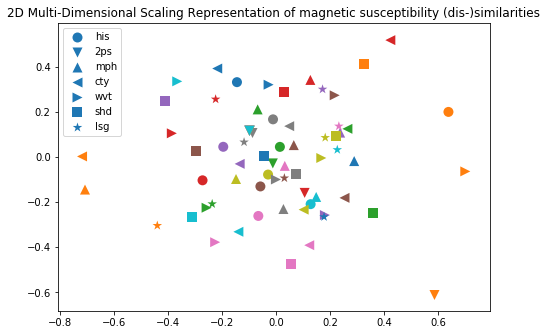

21-Jul-2021 (09:22:51) - MAG. SUSC. DISSIMILARITY COMPARISON END


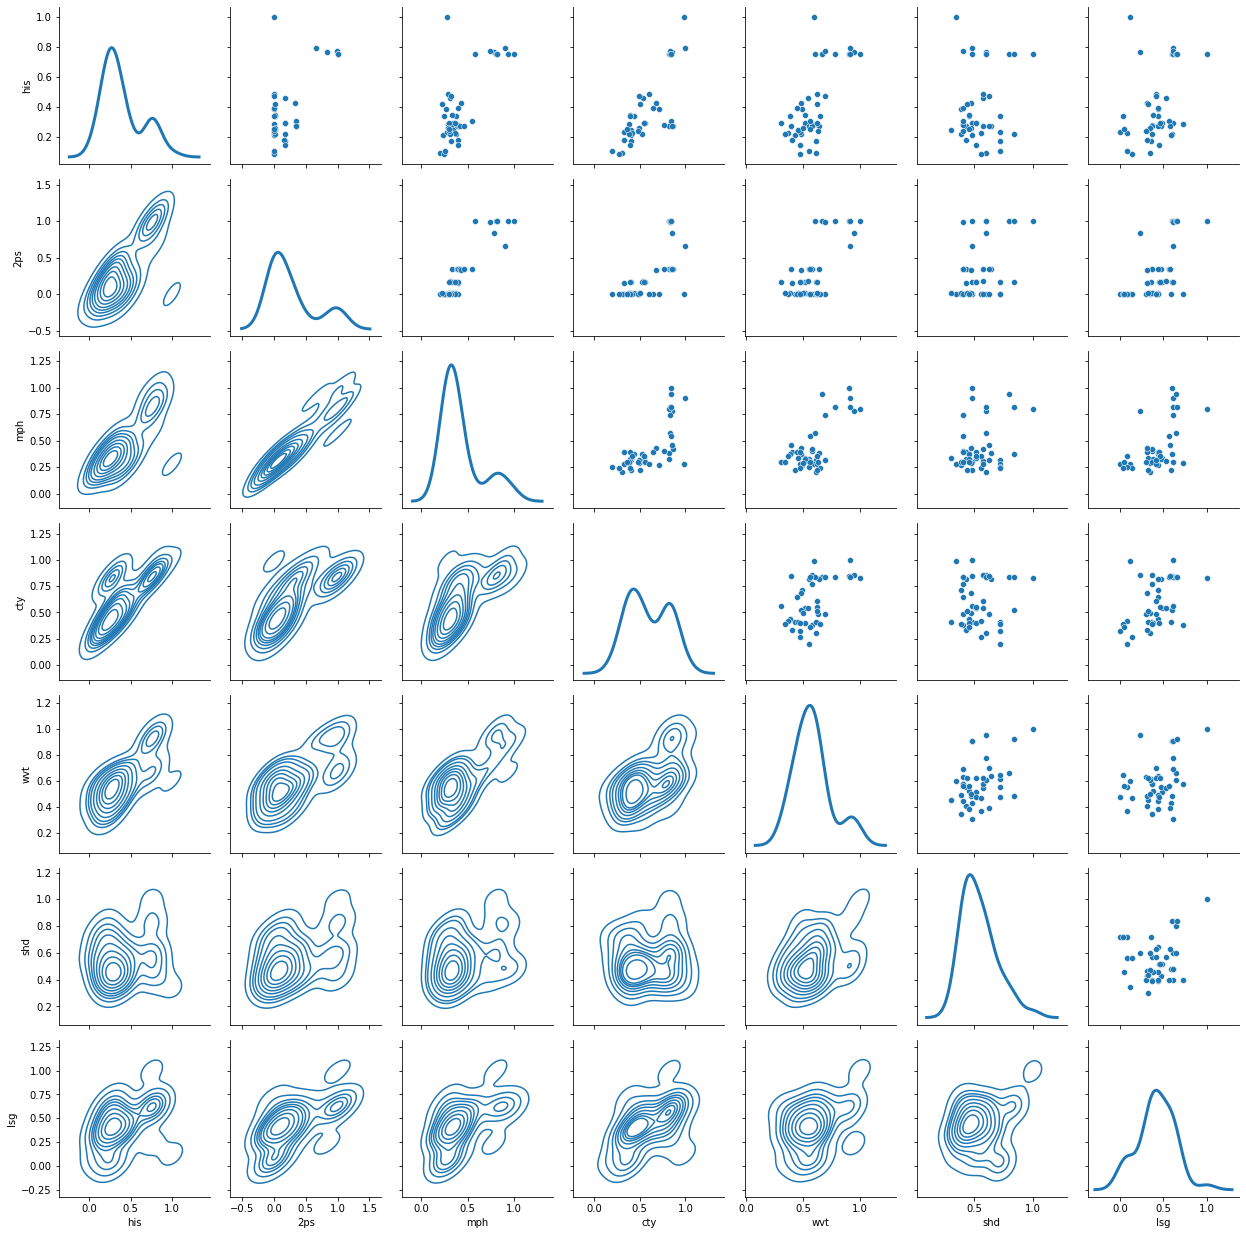

In [7]:
title_spec = 'magnetic susceptibility'
lgd_ent = 'Cont. Entropy'
lgd_card = 'Standard Dev.'

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAG. SUSC. UNCERTAINTY VOXETS COMPARISON START")
entropy = ent_sus
cardinality = sus_std
plot_uncertainty_voxets(cardinality,entropy,lgd_card,lgd_ent,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAG. SUSC. UNCERTAINTY VOXETS COMPARISON END")

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAG. SUSC. DISSIMILARITY COMPARISON START")
# normalization between [0-1]
dist_hist = (dist_hist_sus-np.amin(dist_hist_sus))/(np.amax(dist_hist_sus)-np.amin(dist_hist_sus))
dist_mph = (dist_mph_sus-np.amin(dist_mph_sus))/(np.amax(dist_mph_sus)-np.amin(dist_mph_sus))
dist_2ps = (dist_2ps_sus-np.amin(dist_2ps_sus))/(np.amax(dist_2ps_sus)-np.amin(dist_2ps_sus))
dist_cty = (dist_cty_sus-np.amin(dist_cty_sus))/(np.amax(dist_cty_sus)-np.amin(dist_cty_sus))
dist_wvt = (dist_wvt_sus-np.amin(dist_wvt_sus))/(np.amax(dist_wvt_sus)-np.amin(dist_wvt_sus))
dist_tpl_shd = (dist_tpl_shd_sus-np.amin(dist_tpl_shd_sus))/(np.amax(dist_tpl_shd_sus)-np.amin(dist_tpl_shd_sus))
dist_tpl_lsgd = (dist_tpl_lsgd_sus-np.amin(dist_tpl_lsgd_sus))/(np.amax(dist_tpl_lsgd_sus)-np.amin(dist_tpl_lsgd_sus))
plot_comparison_dissimilarities(dist_hist,dist_2ps,dist_mph,dist_cty,dist_wvt,dist_tpl_shd,dist_tpl_lsgd,title_spec)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"MAG. SUSC. DISSIMILARITY COMPARISON END")